##**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import VotingClassifier
!pip install scikit-plot
import scikitplot as skplt
from sklearn.feature_selection import RFE
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

import datetime as dt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import (
    train_test_split,
    RepeatedStratifiedKFold,
    cross_validate
)

from sklearn.metrics import (
    classification_report,
    roc_curve,
    roc_auc_score,
    auc,
    precision_recall_curve,
    RocCurveDisplay
)

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from imblearn.ensemble import (
    RUSBoostClassifier, 
    EasyEnsembleClassifier
)

%matplotlib inline


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Importing the Final Dataset**

This Experimental log will explore the various classifiers; 1) Decision Tree, 2) Gradient Boosting Classifier, 3) Logistic Regression and 4) Gaussian Naive Bayes, and their respective hyperparameters tuning, to determine which classifier and parameters can provide the best results. We will also explore the feature engineering using PCA to see what are the results we can derived vs the non-PCA. 

In the milestone, we have performed data analysis of the different features of this dataset and also discuss the individual features in detail. We have also discuss the features we will be dropping and also the features we will use for the modelling. In essence, our model should be able to predict all the positive cases ("1") with high accuracy, while predicting both the number of false positives and false negatives cases at very low frequency. This is crucial as if the model predicts the false negatives at a high frequency, it means that it is detecting many of the fraud transaction as non-fraud. This would be very devastating for the institution as many of the transactions will go unnoticed and financial losses will occur and cannot be prevented.

Since we are predicting whether a transaction is fraud or not,  we will emphasize on the model that can give us a high accuracy score, as well as a high recall score, since we want our model to be able to predict all the positive class correctly, and not miss out on misclassifying the positive class as negative. (i.e. we do not want our model to wrongly classify the true fraudulent transactions as non-fradulent). We will study and analyse the confusion matrix in detail of the various models in this experiment.

Over here, we will be importing the final dataset we have agreed to use for this project, after dropping the unwanted features, and will discuss the various modelling technique that we will use to train and test our dataset, and also perform some error analysis of the results, and finally hyperparameter tuning, including data resampling technique to see which model and parameter can give us the better reult. Finally, we will also create a simple flask application for the deployment of the model.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')
datadir='/content/drive/My Drive/Data/DS/'
df =pd.read_csv(datadir+'full_dataencode 2.csv') 
df=df.drop(['Unnamed: 0'],axis=1)
df.head(3)


Mounted at /content/drive


,amt,city_pop,hour,month,day,week,age,AK,AL,AR,...,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,is_fraud
0,4.97,3495,0,1,1,1,34,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,107.23,149,0,1,1,1,44,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,220.11,4154,0,1,1,1,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In this milestone, we have performed one-hot encoding for the features we intent to use for the modelling, which includes the above 73 features. The is_fraud column is the target that we are predicting, whether fraud ("1") or non-fraud ("0")

###**Model Training**

First, we split the dataset into training and testing dataset using the Stratified Shuffle Split since our dataset is highly imbalanced (99.5% of non-fraud vs 0.5% fraud).

After that, we will use the class_weight = balanced for the Decision Tree and Logistic Regression to see the results, and also using boosting and SMOTE/Undersampler on the majority class ato see the difference in results.



In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

feature_cols = [x for x in df.columns if x != 'is_fraud']

strat_shuff_split = StratifiedShuffleSplit(n_splits=50, test_size=0.2, random_state=42)

train_idx, test_idx = next(strat_shuff_split.split(df[feature_cols], df['is_fraud']))

# Create the data sets
X_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'is_fraud']

X_test = df.loc[test_idx, feature_cols]
y_test = df.loc[test_idx, 'is_fraud']

#Normalizing the dataset
scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Here, we print the training and testing dataset

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print('Training data:\n', y_train.value_counts())
print('\nTest data:\n',   y_test.value_counts())

(1481915, 72)
(370479, 72)
(1481915,)
(370479,)
Training data:
 0    1474194
1       7721
Name: is_fraud, dtype: int64

Test data:
 0    368549
1      1930
Name: is_fraud, dtype: int64


As seen above, the dataset is highly imbalanced, about 99.5% is non-fraud "0" and 0.5% is fraud "1".

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

Accuracy score: 99.85991108807787
0.8786872864270112
[[368498     51]
 [   468   1462]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.97      0.76      0.85      1930

    accuracy                           1.00    370479
   macro avg       0.98      0.88      0.92    370479
weighted avg       1.00      1.00      1.00    370479



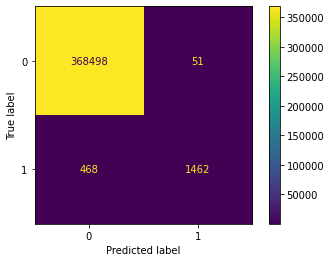

In [ ]:
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print("Accuracy score:",accuracy_score(y_test, y_test_pred) * 100)
print(roc_auc_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred))

In [ ]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = rf_oob.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error');

In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [ ]:
rf_clf = rf_clf.set_params(n_estimators=1100, warm_start=False)

In [ ]:
feature_imp = pd.Series(rf_clf.feature_importances_, index=feature_cols).sort_values(ascending=False)
fig = plt.figure(figsize=(12,5))
ax = feature_imp.plot(kind='bar')
ax.set(ylabel='Relative Importance');

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(rf_clf, X_train, y_train, cv=3, method="predict")
y_train_pred_prob = cross_val_predict(rf_clf, X_train, y_train, cv=3, method="predict_proba")

In [ ]:
train_error = pd.concat([measure_error(y_train, y_train_pred, 'train')],
                         axis=1)

train_error

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

In [ ]:
y_test_pred = rf_clf.predict(X_test)
test_error = pd.concat([measure_error(y_test, y_test_pred, 'test')],
                       axis=1)

test_error

##***Decision Tree Classifier***

In [ ]:
dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Get the number of nodes and the depth of the tree
dt_clf.tree_.node_count, dt_clf.tree_.max_depth

(10313, 74)

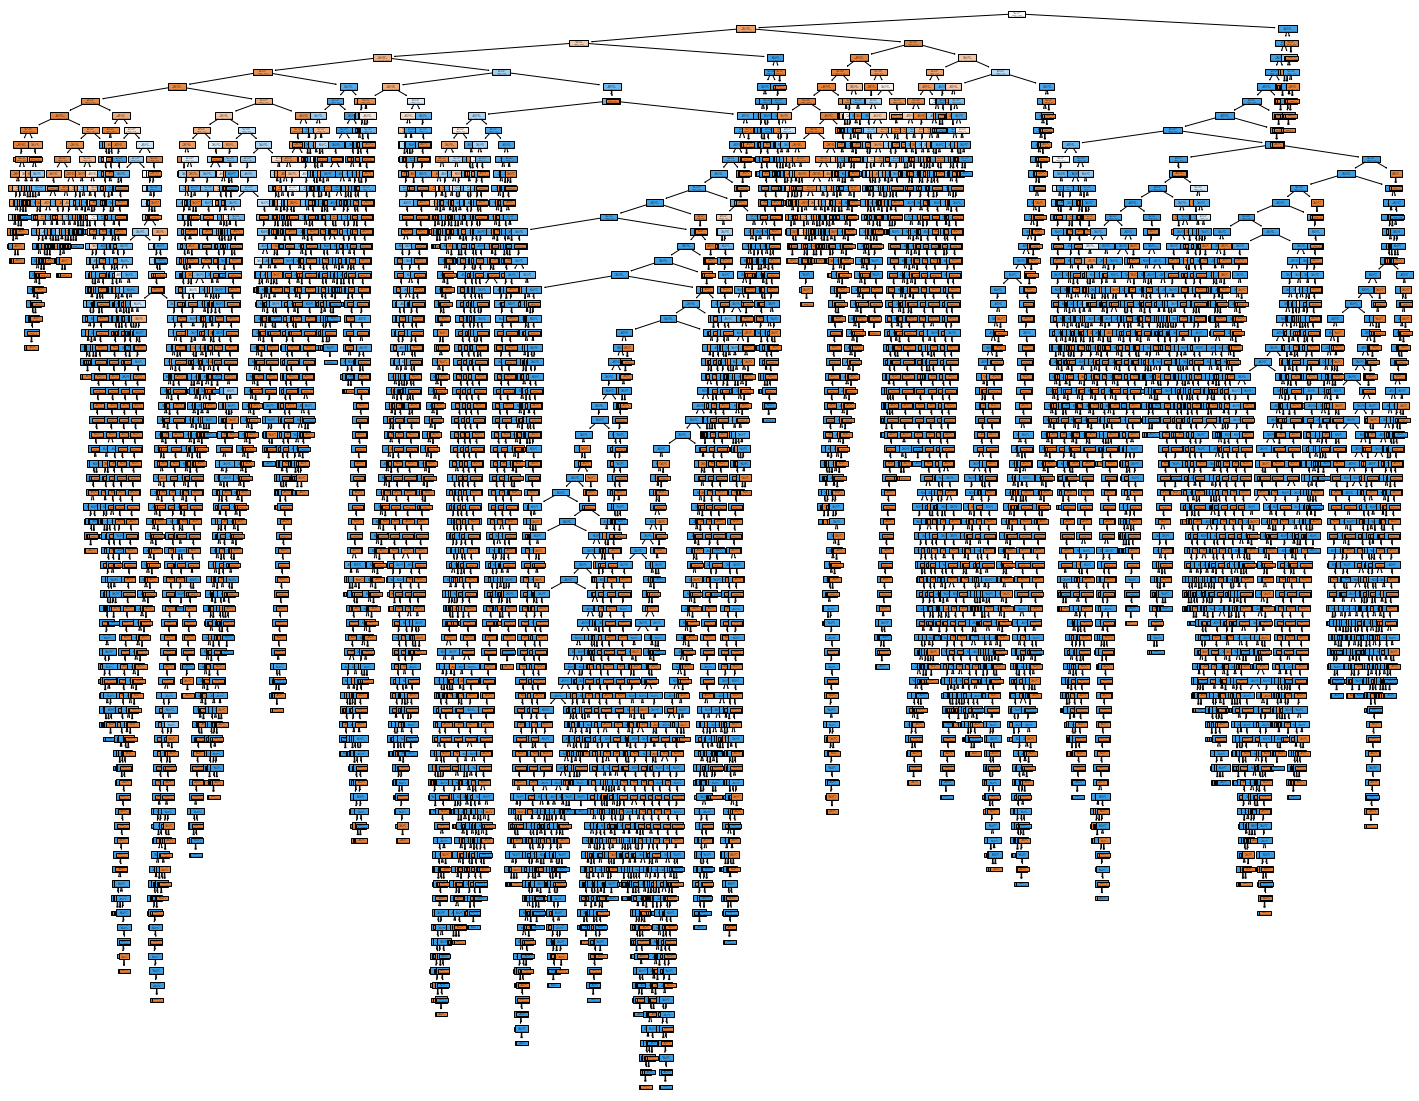

In [ ]:
# Plot tree representation
from sklearn.tree import plot_tree
plt.figure(figsize=(25,20))
plot_tree(dt_clf, filled=True)
plt.show()

['amt', 'city_pop', 'hour', 'month', 'day', 'week', 'age', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'entertainment', 'food_dining', 'gas_transport', 'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net', 'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos', 'travel']
72 features in total
[6.81380177e-01 1.19107494e-02 8.07935864e-02 1.45669651e-03
 2.91957241e-03 6.40616585e-03 1.97919953e-02 6.55600808e-06
 3.87336606e-04 2.08710617e-04 3.23092671e-04 5.13894594e-04
 1.05613681e-04 9.96895761e-05 1.78246165e-04 0.00000000e+00
 5.28332123e-04 3.99398620e-04 4.07760360e-05 2.37852564e-04
 5.41737171e-05 2.89237088e-04 3.02014096e-04 1.47918923e-04
 1.35177392e-04 3.00044743e-04 3.34543936e-04 2

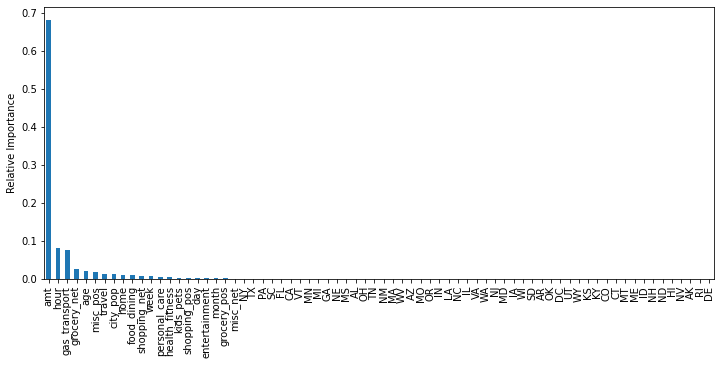

In [ ]:
print(feature_cols)
print(len(feature_cols), 'features in total')
print(dt_clf.feature_importances_)
feature_imp = pd.Series(dt_clf.feature_importances_, index=feature_cols).sort_values(ascending=False)
fig = plt.figure(figsize=(12,5))
ax = feature_imp.plot(kind='bar')
ax.set(ylabel='Relative Importance');

Here, we see that ***Amount, Hour, and Category*** features are the 3 most important features for the Decision Tree model, with amount alone at about 72%.

In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

           train      test
accuracy     1.0  0.997924
precision    1.0  0.797540
recall       1.0  0.806218
f1           1.0  0.801855
0.9025729229669013
[[368154    395]
 [   374   1556]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.80      0.81      0.80      1930

    accuracy                           1.00    370479
   macro avg       0.90      0.90      0.90    370479
weighted avg       1.00      1.00      1.00    370479

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


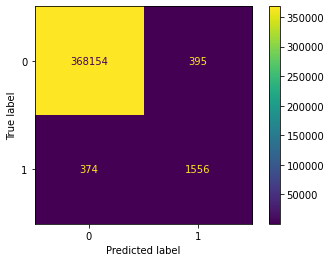

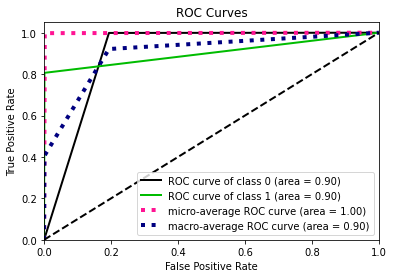

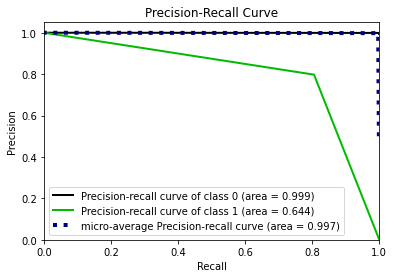

In [ ]:
y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)

print(train_test_full_error)
print(roc_auc_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred))
dtc_probas = dt_clf.predict_proba(X_test)
print(skplt.metrics.plot_roc(y_test, dtc_probas))
print(skplt.metrics.plot_precision_recall(y_test, dtc_probas))

***Results***: We can see that the accuracy score for the test dataset is pretty high, almost at 99.8%, and the roc_auc score of 90.25%.  The recall score of about 0.81 and F1 score of 0.80 is also quite good, which means that the model is able to predict the positive class well. The model also predicted 395 false positives and 374 false negatives.

However, Decision Tree is proned to overfitting, especially because by its default parameters it will grow into full depth and reach all the training data. Hence, we need to look at tuning such as tree pruning/reducing the branches to stop the tree from growing into full depth.  


##**Hyperparameter Tuning using GridSearchCV - Decision Tree**

In [ ]:
param_grid = {'max_depth': range(1, 10, 1),
              'max_features': range(1, 6)}

gr_dt_clf = GridSearchCV(DecisionTreeClassifier(random_state=42),
                         param_grid=param_grid, 
                         scoring='accuracy',
                         n_jobs=-1)

In [ ]:
gr_dt_clf.fit(X_train,y_train)

acc = gr_dt_clf.score(X_test, y_test)
print("Accuracy=", acc)

print(gr_dt_clf.best_params_)

print(gr_dt_clf.best_estimator_.feature_importances_)
#takes about 5 minutes to run

Accuracy= 0.9948418128962775
{'max_depth': 8, 'max_features': 4}
[5.74724583e-01 4.73805535e-02 1.53461691e-01 6.62702018e-03
 1.29128688e-02 2.18792176e-02 4.20453566e-02 0.00000000e+00
 0.00000000e+00 1.19648630e-04 1.34895761e-03 0.00000000e+00
 6.68850212e-05 1.26236410e-03 0.00000000e+00 0.00000000e+00
 8.02778819e-05 5.31282521e-05 0.00000000e+00 1.45588954e-03
 0.00000000e+00 2.51888787e-04 5.83174733e-06 1.68845139e-05
 3.79116758e-05 6.49367201e-04 0.00000000e+00 6.03186437e-04
 4.87621693e-04 8.21710830e-06 0.00000000e+00 1.36677984e-04
 0.00000000e+00 0.00000000e+00 5.54952273e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.01977503e-03 0.00000000e+00
 0.00000000e+00 1.06300504e-03 0.00000000e+00 4.66512031e-05
 2.43685054e-03 5.34618382e-04 4.33421078e-03 1.31957033e-04
 2.47920287e-05 3.25782937e-07 3.38411147e-04 1.67741345e-04
 5.32498489e-04 9.28463539e-05 0.00000000e+00 6.42081295e-06
 0.00000000e+00 1.46925719e-03 3.69817563e-03 0.00000000e+00
 0.00000000e+00 0.00

Accuracy score: 99.48418128962774
0.5054377011643632
[[368547      2]
 [  1909     21]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368549
           1       0.91      0.01      0.02      1930

    accuracy                           0.99    370479
   macro avg       0.95      0.51      0.51    370479
weighted avg       0.99      0.99      0.99    370479



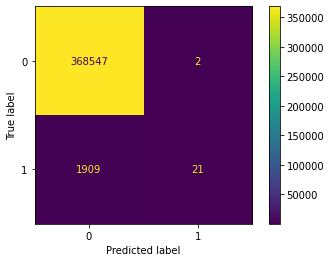

In [ ]:
y_train_pred = gr_dt_clf.predict(X_train)
y_test_pred = gr_dt_clf.predict(X_test)

print("Accuracy score:",accuracy_score(y_test, y_test_pred) * 100)
print(roc_auc_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred))

***Results***: After hyperparameter tuning using GridSearchCV, we are able to get an accuracy score of **99.48%** with the max depth at 8, and max features at 4. However, notice that the model does poorly at detecting the false negatives, resulting in poor recall score. The model is also predicting a very high precision score. 

Let us see if using another hyperparamter tuning is able to increase the prediction results.

##**Hyperparameter Tuning using RandomizedSearchCV - Decision Tree**

In [ ]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
 
# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
 
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
 
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
 
tree_cv.fit(X_train, y_train)
 
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
#takes about 5 minutes to run

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 6}
Best score is 0.9972252119723466


***Results***: Using RandomisedSearchCV, the best parameters are {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 2}. Best score is 0.9975241494957539

0.9974357520939109
0.8013047765514606
[[368365    184]
 [   766   1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.86      0.60      0.71      1930

    accuracy                           1.00    370479
   macro avg       0.93      0.80      0.85    370479
weighted avg       1.00      1.00      1.00    370479

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


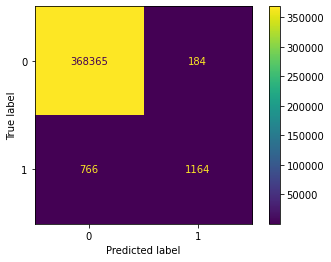

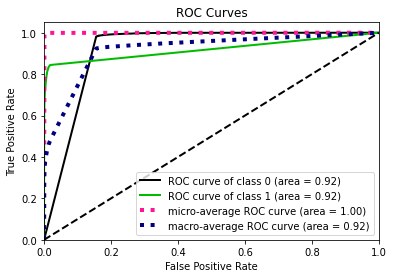

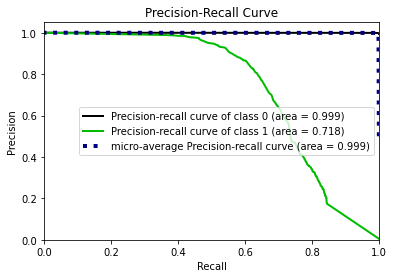

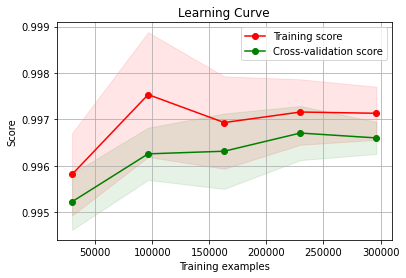

In [ ]:
y_train_pred = tree_cv.predict(X_train)
y_test_pred = tree_cv.predict(X_test)

print(accuracy_score(y_test, y_test_pred))
print(roc_auc_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred))

dtc_probas = tree_cv.predict_proba(X_test)
print(skplt.metrics.plot_roc(y_test, dtc_probas))
print(skplt.metrics.plot_precision_recall(y_test, dtc_probas))
skplt.estimators.plot_learning_curve(tree_cv,X_test, y_test)
plt.show()
#learning curve takes over 5 minutes to run

***Results***: Using RandomizedSearchCV performance tuning, we are able to obtain an accuracy score of 99.74%, and a recall score of 0.60. Although the recall seems to have fallen vs the default paramaters, this is especially so because we have set the maximum depth the tree is allowed to reach to prevent overfitting.




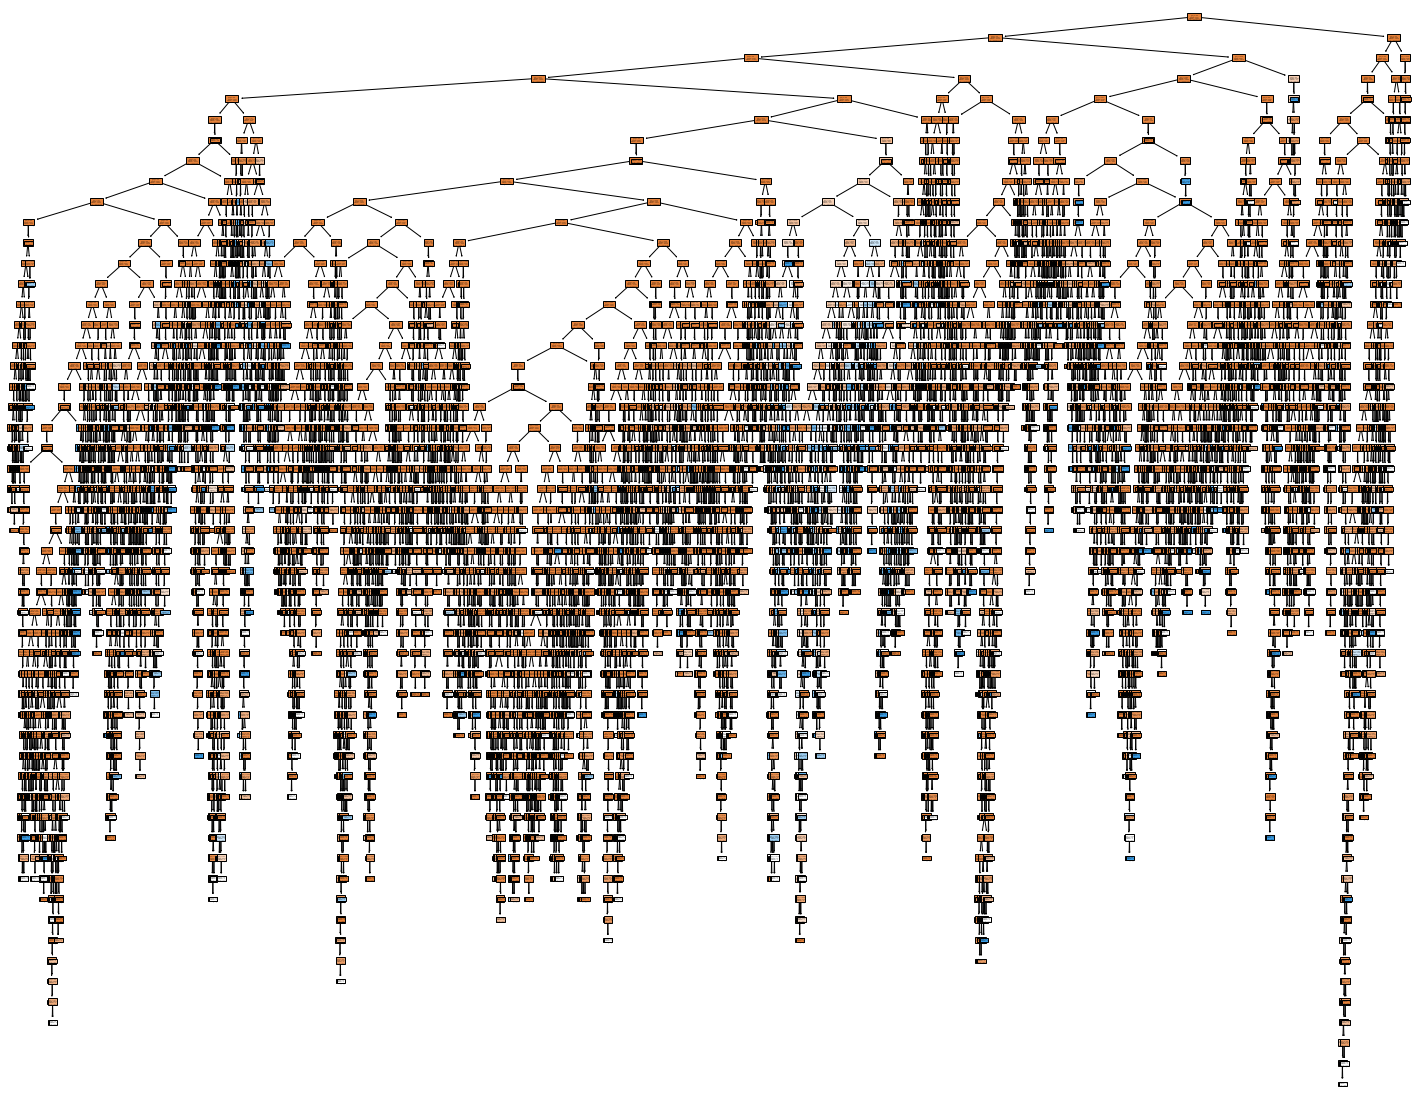

In [ ]:
#plot the tree
plt.figure(figsize=(25,20))
plot_tree(tree_cv.best_estimator_, filled=True)
plt.show()

Now lets try to see if using the data sampling methods, SMOTE and UnderSampler is able to obtain a better result.

###**Using SMOTE to resample the data (Pipeline and CV)**

In [ ]:
sm = SMOTE(sampling_strategy='auto', random_state=42)
clf = DecisionTreeClassifier(class_weight="balanced", random_state=42)

# declare a pipeline that consists of the oversampler and the classifier
steps = [('ovr', sm), ('clf', clf)]
pipeline = Pipeline(steps=steps)

# the oversampling is only applied to the train folds
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
scores = cross_validate(pipeline, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)

print('average roc_auc = {}'.format(scores['test_roc_auc'].mean()))


average roc_auc = 0.9038607008217447


##**Using SMOTE - Decision Tree**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.59      0.82      0.69      1930

    accuracy                           1.00    370479
   macro avg       0.80      0.91      0.84    370479
weighted avg       1.00      1.00      1.00    370479

Accuracy: 0.9961212376409999
F1: [0.99804854 0.6865867 ]
[[367468   1081]
 [   356   1574]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.59      0.82      0.69      1930

    accuracy                           1.00    370479
   macro avg       0.80      0.91      0.84    370479
weighted avg       1.00      1.00      1.00    370479

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


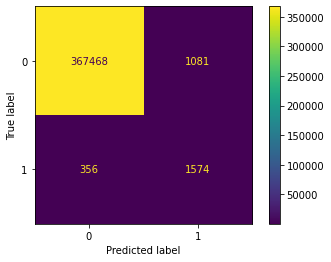

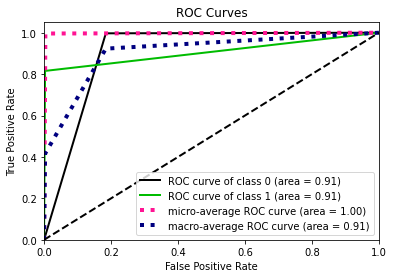

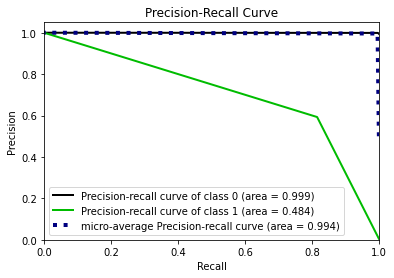

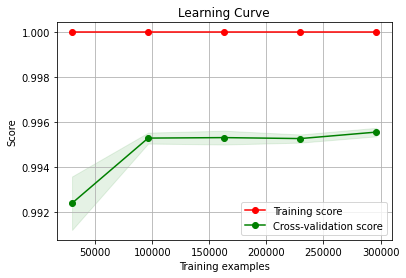

In [ ]:
smt = SMOTE(random_state=42)
dtc = DecisionTreeClassifier(class_weight='balanced', random_state=42)
pipeline = Pipeline([('smt', smt), ('dtc', dtc)])
pipeline.fit(X_train, y_train) 
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred, average=None))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

dtc_smt_probas = pipeline.predict_proba(X_test)
print(skplt.metrics.plot_roc(y_test, dtc_smt_probas))
print(skplt.metrics.plot_precision_recall(y_test, dtc_smt_probas))
skplt.estimators.plot_learning_curve(pipeline,X_test, y_test)
plt.show()

***Results***: Using SMOTE sampling, we are able to obtain an accuracy score of 99.61%, with a higher recall score of 0.82. However, the model is predicting a higher number of false positive cases, resulting in a lower F1 score. 

***Using undersampler on the majority class seems to give us a better result***

Now lets try using the feature importances selected features and run the Decision Tree model again

##**Selecting Features from Feature Importances for Decision Tree**

In [ ]:
df = df[['amt','hour','gas_transport','age','misc_pos','travel','city_pop','is_fraud']].copy()
df.head(3)

,amt,hour,gas_transport,age,misc_pos,travel,city_pop,is_fraud
0,4.97,0,0,34,0,0,3495,0
1,107.23,0,0,44,0,0,149,0
2,220.11,0,0,60,0,0,4154,0


In [ ]:
feature_cols = [x for x in df.columns if x != 'is_fraud']

strat_shuff_split = StratifiedShuffleSplit(n_splits=50, test_size=0.2, random_state=42)

train_idx, test_idx = next(strat_shuff_split.split(df[feature_cols], df['is_fraud']))

# Create the data sets
X_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'is_fraud']

X_test = df.loc[test_idx, feature_cols]
y_test = df.loc[test_idx, 'is_fraud']

#Normalizing the dataset
scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

['amt', 'hour', 'gas_transport', 'age', 'misc_pos', 'travel', 'city_pop']
7 features in total
[0.71340726 0.10082067 0.07592181 0.03837005 0.01734462 0.01280013
 0.04133546]


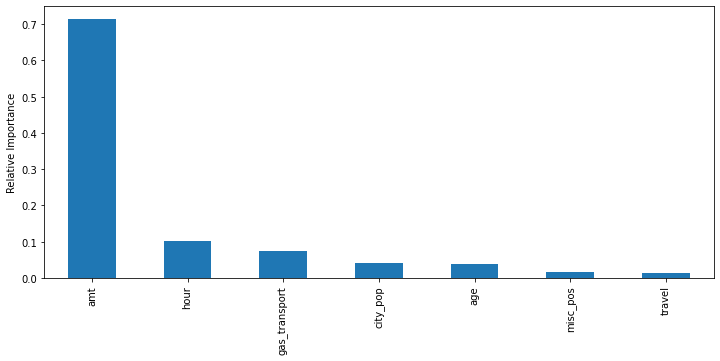

In [ ]:
dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_clf.fit(X_train, y_train)

print(feature_cols)
print(len(feature_cols), 'features in total')
print(dt_clf.feature_importances_)
feature_imp = pd.Series(dt_clf.feature_importances_, index=feature_cols).sort_values(ascending=False)
fig = plt.figure(figsize=(12,5))
ax = feature_imp.plot(kind='bar')
ax.set(ylabel='Relative Importance');

In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

              train      test
accuracy   0.999997  0.996521
precision  0.999482  0.678353
recall     1.000000  0.631606
f1         0.999741  0.654145
0.8150189525631233
[[367971    578]
 [   711   1219]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.68      0.63      0.65      1930

    accuracy                           1.00    370479
   macro avg       0.84      0.82      0.83    370479
weighted avg       1.00      1.00      1.00    370479



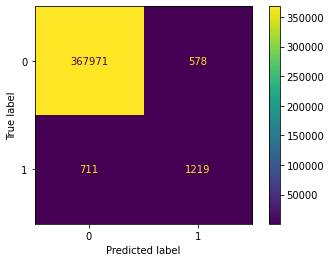

In [ ]:
y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)

print(train_test_full_error)
print(roc_auc_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred))

In [ ]:
param_grid = {'max_depth': range(1, 10, 1),
              'max_features': range(1, 6)}

gr_dt_clf = GridSearchCV(DecisionTreeClassifier(random_state=42),
                         param_grid=param_grid, 
                         scoring='accuracy',
                         n_jobs=-1)

In [ ]:
gr_dt_clf.fit(X_train,y_train)

acc = gr_dt_clf.score(X_test, y_test)
print("Accuracy=", acc)

print(gr_dt_clf.best_params_)

print(gr_dt_clf.best_estimator_.feature_importances_)

Accuracy= 0.9974168576356555
{'max_depth': 9, 'max_features': 5}
[0.57153787 0.12372782 0.11470537 0.11881755 0.03362818 0.01958607
 0.01799713]


0.7979450409340189
[[368371    178]
 [   779   1151]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.87      0.60      0.71      1930

    accuracy                           1.00    370479
   macro avg       0.93      0.80      0.85    370479
weighted avg       1.00      1.00      1.00    370479



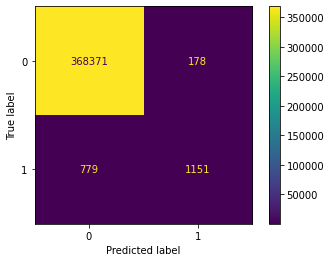

In [ ]:
y_train_pred = gr_dt_clf.predict(X_train)
y_test_pred = gr_dt_clf.predict(X_test)

print(roc_auc_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred))

***Results***: Although we tried selecting only the features from the feature importance, the accuracy and recall score did not differ much from our earlier model using RandomizedsearchCV.

##**Gradient Boosting**

In [ ]:
clf = GradientBoostingClassifier(random_state=42)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
scores = cross_validate(clf, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)
print('Cross-validate ROC_AUC with GradientBoosting = {}'.format(scores['test_roc_auc'].mean()))

Cross-validate ROC_AUC with GradientBoosting = 0.8602222716924091


***Using Gradient Boosting Classifier, the roc_auc score is 0.86***

Lets try to hyperparameter Tune the model and find the best parameter

In [ ]:
model = GradientBoostingClassifier()
n_estimators = [10, 100]
learning_rate = [0.001, 0.01, 0.1]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
#System crashed when using hyperparameter tuning

KeyboardInterrupt: ignored

In [ ]:
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

print(accuracy_score(y_test, y_test_pred))
print(roc_auc_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred))

gradient_probas = grid_search.predict_proba(X_test)
print(skplt.metrics.plot_roc(y_test, gradient_probas))
print(skplt.metrics.plot_precision_recall(y_test, gradient_probas))

***Results***: The Gradient Boosting Classifier is able to get an roc_auc score of 0.86. However, during hyperparameter tuning, the system crashed after running for over 30 minutes.

Hence, we are unable to determine what is the best performing parameters when using Gradient Boosting.

##***Logistic Regression***

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Accuracy score: 83.36180998113252
Precision score: 0.019474980283594342
Recall score: 0.6269430051813472
              precision    recall  f1-score   support

           0       1.00      0.83      0.91    368549
           1       0.02      0.63      0.04      1930

    accuracy                           0.83    370479
   macro avg       0.51      0.73      0.47    370479
weighted avg       0.99      0.83      0.90    370479

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


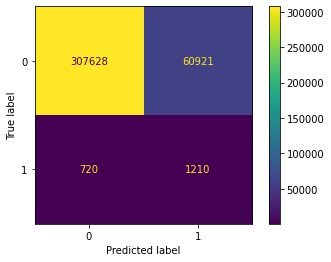

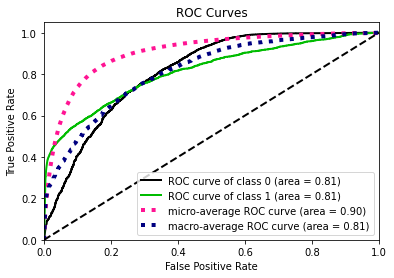

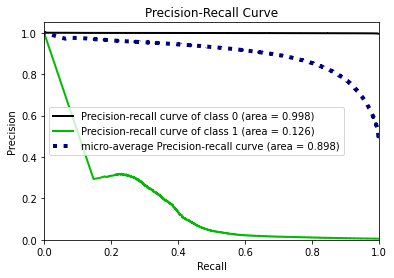

In [ ]:
lrc_clf = LogisticRegression(class_weight='balanced', solver='saga', random_state=42)
lrc_model = lrc_clf.fit(X_train, y_train)
ypred = lrc_model.predict(X_test)

print("Accuracy score:",accuracy_score(y_test, ypred) * 100)
print("Precision score:",precision_score(y_test, ypred))
print("Recall score:",metrics.recall_score(y_test, ypred))
print(classification_report(y_test, ypred))
print(ConfusionMatrixDisplay.from_predictions(y_test, ypred))

lrc_probas = lrc_clf.predict_proba(X_test)
print(skplt.metrics.plot_roc(y_test, lrc_probas))
print(skplt.metrics.plot_precision_recall(y_test, lrc_probas))


***Lets try using SMOTE Sampling on the minority class on the training fold to see if the results are better.***

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy score: 88.80665300867255
Precision score: 0.03445190156599553
Recall score: 0.7580310880829015
              precision    recall  f1-score   support

           0       1.00      0.89      0.94    368549
           1       0.03      0.76      0.07      1930

    accuracy                           0.89    370479
   macro avg       0.52      0.82      0.50    370479
weighted avg       0.99      0.89      0.94    370479

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


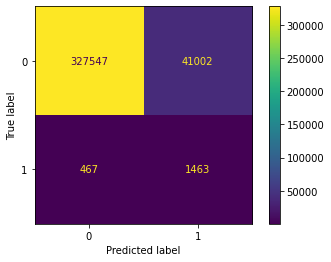

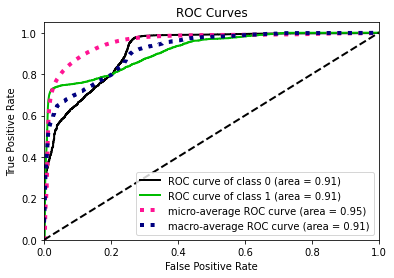

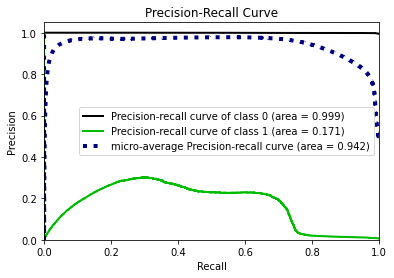

In [ ]:
nb_smt = SMOTE(sampling_strategy='minority')
nb_smt_x, nb_smt_y = nb_smt.fit_resample(X_train, y_train)
nbc_smt = LogisticRegression(random_state=42)
nbc_smt_model = nbc_smt.fit(nb_smt_x, nb_smt_y)
ypred = nbc_smt_model.predict(X_test)

print("Accuracy score:",accuracy_score(y_test, ypred) * 100)
print("Precision score:",precision_score(y_test, ypred))
print("Recall score:",metrics.recall_score(y_test, ypred))
print(classification_report(y_test, ypred))
print(ConfusionMatrixDisplay.from_predictions(y_test, ypred))

lrc_probas = nbc_smt_model.predict_proba(X_test)
print(skplt.metrics.plot_roc(y_test, lrc_probas))
print(skplt.metrics.plot_precision_recall(y_test, lrc_probas))

***Results***: The Logistic Regression does poorly at predicting the correct fraud results, even with class_weight set to balanced. Notice the low F1 score due to the high number of false positives detected, although the recall score is higher than Decision Tree.

When we tried resample the minority class using SMOTE on the training, the results doesnt seem to have improved as well, giving us an accuracy of 88%, F1 score of just 0.07 due to the very low precision score. 

Lets try some hyperparameter tuning for the Logistic Regression to find the best parameters.

##**Hyperparameter Tuning - Logistic Regression**

In [ ]:
nb_smt = SMOTE(sampling_strategy='minority')
nb_smt_x, nb_smt_y = nb_smt.fit_resample(X_train, y_train)

In [ ]:
# parameter grid
parameters = {
    'penalty' : ['l2'], 
    'C'       : np.logspace(0.1,1),
    'solver'  : ['lbfgs', 'liblinear'],
}

In [ ]:
logreg = LogisticRegression(random_state=42)
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=5)                     # number of folds

In [ ]:
clf.fit(nb_smt_x, nb_smt_y)
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

In [ ]:
# Creating the hyperparameter grid
c_space = np.logspace(0.1, 1)
param_grid = {'C': c_space}
 
# Instantiating logistic regression classifier
logreg = LogisticRegression(class_weight='balanced',random_state=42)
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
 
logreg_cv.fit(nb_smt_x, nb_smt_y)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))
#over 30 minutes to run and system crashed

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


KeyboardInterrupt: ignored

0.9947905279381557
0.5
[[368549      0]
 [  1930      0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368549
           1       0.00      0.00      0.00      1930

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


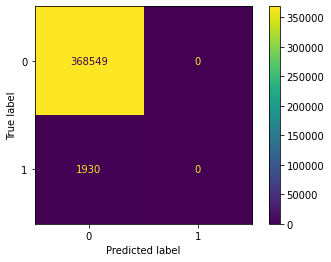

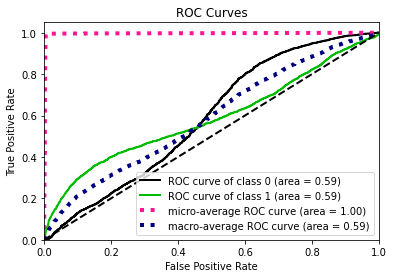

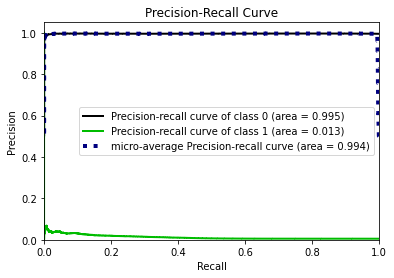

In [ ]:
y_train_pred = logreg_cv.predict(X_train)
y_test_pred = logreg_cv.predict(X_test)

print(accuracy_score(y_test, y_test_pred))
print(roc_auc_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred))

lr_probas = logreg_cv.predict_proba(X_test)
print(skplt.metrics.plot_roc(y_test, lr_probas))
print(skplt.metrics.plot_precision_recall(y_test, lr_probas))

***Results***: After tuning the logistic regression, we are able to get the best parameter at C = 100000 with an accuracy score of 99.47%

##**SMOTE and UnderSampler - Logistic Regression**

In [ ]:
sm = SMOTE(sampling_strategy='auto', random_state=42)
clf = LogisticRegression(class_weight="balanced", solver="sag", random_state=42)

# declare a pipeline that consists of SMOTE and the classifier
steps = [('ovr', sm), ('clf', clf)]
pipeline = Pipeline(steps=steps)

# the oversampling is only applied to the train folds
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
scores = cross_validate(pipeline, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)

print('average roc_auc = {}'.format(scores['test_roc_auc'].mean()))


average roc_auc = 0.8418191669785076


Lets try resampling the majority class using Undersmapler and see if the results are better.

In [ ]:
undersampler  = RandomUnderSampler(sampling_strategy='auto', random_state=42)
clf = LogisticRegression(class_weight='balanced', random_state=42)

# declare a pipeline that consists of the oversampler and the classifier
steps = [('under', undersampler), ('clf', clf)]
pipeline = Pipeline(steps=steps)

# the oversampling is only applied to the train folds
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
scores = cross_validate(pipeline, X_train, y_train, scoring=['roc_auc'], cv=cv, n_jobs=-1)

print('Cross-validation ROC_AUC score Random Undersampling = {}'.format(scores['test_roc_auc'].mean()))

Cross-validation ROC_AUC score Random Undersampling = 0.8388597101166015


##***Naive Bayes***

Accuracy score: 94.01990396216789
Precision score: 0.046544997982153266
Recall score: 0.5378238341968912
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    368549
           1       0.05      0.54      0.09      1930

    accuracy                           0.94    370479
   macro avg       0.52      0.74      0.53    370479
weighted avg       0.99      0.94      0.96    370479

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


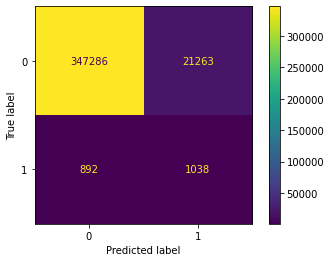

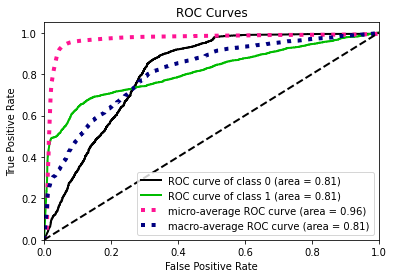

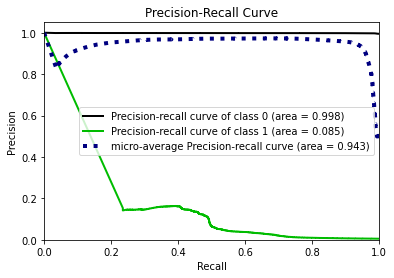

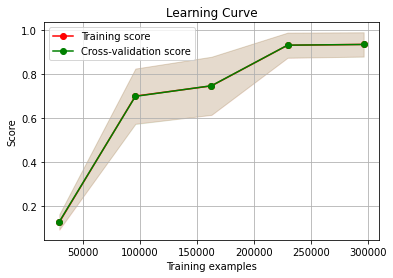

In [ ]:
nb_rus = RandomUnderSampler()
nb_rus_x, nb_rus_y = nb_rus.fit_resample(X_train, y_train)
nbc_rus = GaussianNB()
nbc_rus_model = nbc_rus.fit(nb_rus_x, nb_rus_y)
nbc_rus_pred = nbc_rus_model.predict(X_test)

print("Accuracy score:",accuracy_score(y_test, nbc_rus_pred) * 100)
print("Precision score:",precision_score(y_test, nbc_rus_pred))
print("Recall score:",metrics.recall_score(y_test, nbc_rus_pred))
print(classification_report(y_test, nbc_rus_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, nbc_rus_pred))

nbc_rus_probas = nbc_rus.predict_proba(X_test)
print(skplt.metrics.plot_roc(y_test, nbc_rus_probas))
print(skplt.metrics.plot_precision_recall(y_test, nbc_rus_probas))
skplt.estimators.plot_learning_curve(nbc_rus,X_test, y_test)
plt.show()

***Results***: Using Random Under Smapler for the training folds, we are able to obtain a good accuracy score of 94%, however, the model is predicting the false positives at a very high instances resulting in a very low F1 score. The recall score of 0.54 is also not very good.

Lets try using SMOTE sampler and see if it is able to improve the results

Accuracy score: 92.8878559918376
Precision score: 0.038968394819318054
Recall score: 0.5347150259067357
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    368549
           1       0.04      0.53      0.07      1930

    accuracy                           0.93    370479
   macro avg       0.52      0.73      0.52    370479
weighted avg       0.99      0.93      0.96    370479

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


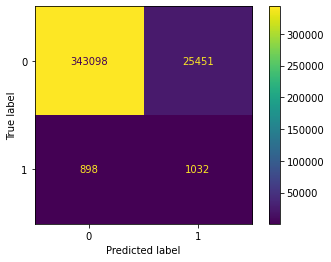

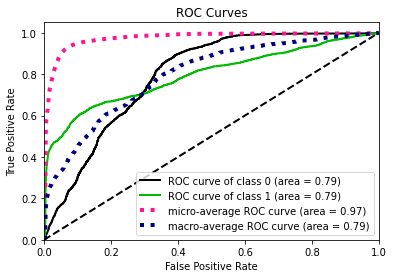

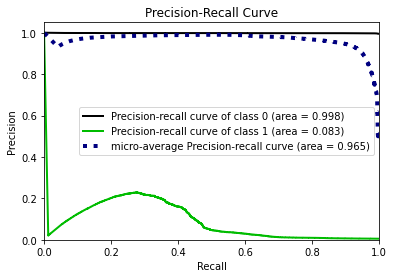

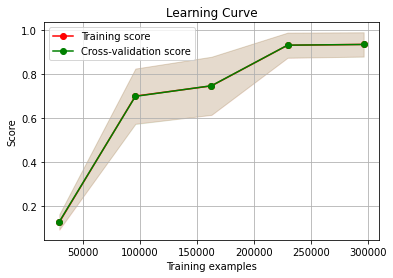

In [ ]:
nb_smt = SMOTE()
nb_smt_x, nb_smt_y = nb_smt.fit_resample(X_train, y_train)
nbc_smt = GaussianNB()
nbc_smt_model = nbc_smt.fit(nb_smt_x, nb_smt_y)
nbc_smt_pred = nbc_smt_model.predict(X_test)

print("Accuracy score:",accuracy_score(y_test, nbc_smt_pred) * 100)
print("Precision score:",precision_score(y_test, nbc_smt_pred))
print("Recall score:",metrics.recall_score(y_test, nbc_smt_pred))
print(classification_report(y_test, nbc_smt_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, nbc_smt_pred))

nbc_smt_probas = nbc_smt.predict_proba(X_test)
print(skplt.metrics.plot_roc(y_test, nbc_smt_probas))
print(skplt.metrics.plot_precision_recall(y_test, nbc_smt_probas))
skplt.estimators.plot_learning_curve(nbc_smt,X_test, y_test)
plt.show()

***Results***: Using SMOTE, the model did not significantly improve the scores. It is still predicting at a very lower precision resulting in low F1 score. The recall score of 0.53 is still lower than the Decision Tree model.

Lets try hyperparameter tuning to see the results.

##***Hyperparameter Tuning - Naive Bayes***

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(nb_smt_x, nb_smt_y)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=1.519911082952933e-09)


[0 0 0 ... 0 0 0]
Accuracy score: 97.72483730521839
Precision score: 0.14349972572682393
Recall score: 0.677720207253886
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    368549
           1       0.14      0.68      0.24      1930

    accuracy                           0.98    370479
   macro avg       0.57      0.83      0.61    370479
weighted avg       0.99      0.98      0.98    370479

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


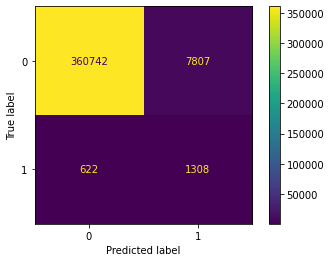

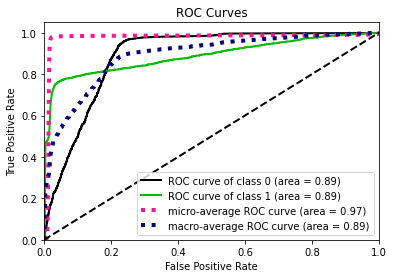

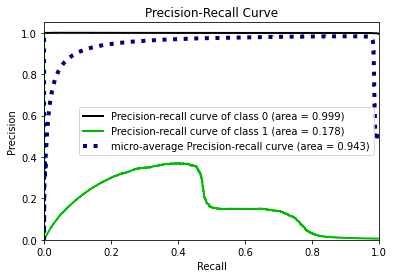

In [ ]:
y_pred = nbModel_grid.predict(X_test)
print(y_pred)

print("Accuracy score:",accuracy_score(y_test, y_pred) * 100)
print("Precision score:",precision_score(y_test, y_pred))
print("Recall score:",metrics.recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

nbc_smt_probas = nbModel_grid.predict_proba(X_test)
print(skplt.metrics.plot_roc(y_test, nbc_smt_probas))
print(skplt.metrics.plot_precision_recall(y_test, nbc_smt_probas))


***Results***: Using Hyperparameter tuning, the recall has improved to 0.67, with an accuracy of 97.72. However, the precision score is still low, affecting the F1 score. 

##***Other experiments - Using PCA***

##**PCA - n-components = 4**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X=df.drop(['is_fraud'],axis=1)
y=df['is_fraud']
scaler = MinMaxScaler()
X = scaler.fit_transform(X) 


In [ ]:
pca = PCA(n_components=4)
X_t = pca.fit_transform(X)
X_reduced_df = pd.DataFrame(X_t, columns=["1st principal component", "2nd principal component", "3rd principal component","4th principal component"])

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_reduced_df, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)     

In [ ]:
#Before Data Balancing
lrc_pca = LogisticRegression(random_state=42)
model_lrc_pca = lrc_pca.fit(X_train_pca, y_train_pca)
lrc_pred_pca = model_lrc_pca.predict(X_test_pca)
print("Accuracy score:",accuracy_score(y_test_pca, lrc_pred_pca) * 100)
print("Precision score:",precision_score(y_test_pca, lrc_pred_pca))
print("Recall score:",metrics.recall_score(y_test_pca, lrc_pred_pca))

Accuracy score: 99.47905279381557
Precision score: 0.0
Recall score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**High imbalance data resulting in bias on the results. Will perform the 3 sampling methods to see which sampling gives the best result.**

##**Modelling - PCA**

In [ ]:
#Random Under Sampling
from imblearn.under_sampling import RandomUnderSampler
m_rus = RandomUnderSampler()
m_rus_x_pca, m_rus_y_pca = m_rus.fit_resample(X_train_pca, y_train_pca)
m_lrc_rus_pca = LogisticRegression(random_state=42)
m_model_lrc_rus_pca = m_lrc_rus_pca.fit(m_rus_x_pca, m_rus_y_pca)
m_lrc_pred_rus_pca = m_model_lrc_rus_pca.predict(X_test_pca)
print("Accuracy score:",accuracy_score(y_test_pca, m_lrc_pred_rus_pca) * 100)
print("Precision score:",precision_score(y_test_pca, m_lrc_pred_rus_pca))
print("Recall score:",metrics.recall_score(y_test_pca, m_lrc_pred_rus_pca))

Accuracy score: 52.770062540656824
Precision score: 0.005921619908520395
Recall score: 0.5373056994818652


In [ ]:
#Random Over Sampling
from imblearn.under_sampling import RandomUnderSampler
m_ros = RandomOverSampler()
m_ros_x_pca, m_ros_y_pca = m_ros.fit_resample(X_train_pca, y_train_pca)
m_lrc_ros_pca = LogisticRegression(random_state=42)
m_model_lrc_ros_pca = m_lrc_ros_pca.fit(m_ros_x_pca, m_ros_y_pca)
m_lrc_pred_ros_pca = m_model_lrc_ros_pca.predict(X_test_pca)
print("Accuracy score:",accuracy_score(y_test_pca, m_lrc_pred_ros_pca) * 100)
print("Precision score:",precision_score(y_test_pca, m_lrc_pred_ros_pca))
print("Recall score:",metrics.recall_score(y_test_pca, m_lrc_pred_ros_pca))


Accuracy score: 52.75143800323365
Precision score: 0.005998242189729366
Recall score: 0.5445595854922279


In [ ]:
#SMOTE
m_smt = SMOTE()
m_smt_x_pca, m_smt_y_pca = m_smt.fit_resample(X_train_pca, y_train_pca)
m_lrc_smt_pca = LogisticRegression(random_state=42)
m_model_lrc_smt_pca = m_lrc_smt_pca.fit(m_smt_x_pca, m_smt_y_pca)
m_lrc_pred_smt_pca = m_model_lrc_smt_pca.predict(X_test_pca)
print("Accuracy score:",accuracy_score(y_test_pca, m_lrc_pred_smt_pca) * 100)
print("Precision score:",precision_score(y_test_pca, m_lrc_pred_smt_pca))
print("Recall score:",metrics.recall_score(y_test_pca, m_lrc_pred_smt_pca))


Accuracy score: 52.81513931963755
Precision score: 0.006000685792662019
Recall score: 0.5440414507772021


***Results***: From the above results, it does not seem that using any of the 3 data sampling method is able to give us a good prediction result. SMOTE has a only slightly higher accuracy score compared to the other 2 sampling methods.




Accuracy score: 96.39844633568974
Precision score: 0.03556604541385204
Recall score: 0.22642487046632123
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    368549
           1       0.04      0.23      0.06      1930

    accuracy                           0.96    370479
   macro avg       0.52      0.60      0.52    370479
weighted avg       0.99      0.96      0.98    370479



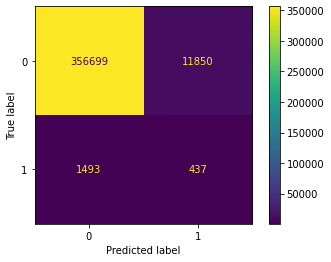

In [ ]:
lrc_pca = DecisionTreeClassifier(random_state=42)
model_lrc_pca = lrc_pca.fit(m_smt_x_pca, m_smt_y_pca)
lrc_pred_pca = model_lrc_pca.predict(X_test_pca)
print("Accuracy score:",accuracy_score(y_test_pca, lrc_pred_pca) * 100)
print("Precision score:",precision_score(y_test_pca, lrc_pred_pca))
print("Recall score:",metrics.recall_score(y_test_pca, lrc_pred_pca))
print(classification_report(y_test_pca, lrc_pred_pca))
print(ConfusionMatrixDisplay.from_predictions(y_test_pca, lrc_pred_pca))

***Results***: Using Decision Tree, we are able to get a higher accuracy score, however the model using PCA is performing poorly at recall score, and is predicting at alot of false positive cases.

In [ ]:
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=3)
nbc = GaussianNB()
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)


In [ ]:
estimators=[('Random Forest', rfc), ('Decision Tree', dtc),('Naive Bayes', nbc),
           ('KNN', knn),('SVC', svc)]
           
final_estimator=LogisticRegression()

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(
 estimators=estimators, final_estimator=LogisticRegression()
 )

In [ ]:
nb_smt = SMOTE(sampling_strategy='minority')
nb_smt_x, nb_smt_y = nb_smt.fit_resample(X_train, y_train)


In [ ]:
stack = clf.fit(nb_smt_x, nb_smt_y)
stack_pred = stack.predict(X_test)

In [ ]:
stack_accuracy = accuracy_score(y_test, stack_pred)
print("Accuracy score is:", stack_accuracy * 100)
print(classification_report(y_test, stack_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, stack_pred))

##***Conclusion***

In the above experiments, we have performed various experiments using a total of 3 main classifiers (Decision Tree, Logistic Regression and Naive Bayes)

We are able to see that the Decision Tree gives us the overall best results, by predicting the fraud cases at very high accuracy, 99.8%, with an acceptable recall score of 0.60 using RandomizedSearchCV hyperparameter tuning.

Although we managed to get a higher recall score of 0.67 after performance tuning for the Naive Bayes, the accuracy score has fallen short of the Decision Tree. The Logistic Regression on the other hand, performs acceptably for the recall scores, however the precision score is very low, indicating that the model is predicting alot of non-fraudulent transactions as fraudulent. As such, it may be good to use this model as our final model as the result will not be accurate.

We are also unable to obtain the paramaters after performing various hyperparameter tuning for the Logistic Regression, as the system just crashed even after alternating the various parameters for over 30 minutes of system running. As such, we are unable to conclude the performance of Logistic Regression with hyperparameter tuning.

Back to selecting the best model, the Decision Tree shows that the 3 most important features are from the Amount, Hour and gas_transport features. The amount feature alone constituted almost 70% impact on the modelling prediction.

In our strive to search for the best model to predict the positive class, we noticed that some models such as Naive Bayes and Logistic Regression can give us a high recall score, but with accuracy score which are below that of the Decision Tree model. The Naive Bayes and Logistic Regression also predicts a much higher cases of fraud positives resulting in lower precision score. 

On the other hand, the Decision Tree seem to be the most consistent and balanced model here, which good accuracy and acceptable recall and precision score. In this experiment, it seems that there is no perfect model that is able to give the best scoring with highest accuracy or recall score, as different model may perform or react differently to the given dataset. However, we hope  that we have demonstrated the different performance results of using the 3 classifiers, and how performance tuning have affected the results, and derived at an agreement that Decision Tree has the overall most balanced results vs the other 2 models we have tested.




##***Model Deployment***

In [ ]:
!pip install flask_ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


***From the above experiments, we observed that the Decision Tree using RandomizedSearchCV is able to give us the best overall results. Hence, we will use this model for the final model.***

***Saving the model***

In [ ]:
pickle.dump(tree_cv, open('model.pkl', 'wb'))

In [ ]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

***Creating a simple flask application and running the application***

In [ ]:
%cd /content

import flask
from flask import Flask, render_template, request
import pickle
import numpy as np
from flask_ngrok import run_with_ngrok
import warnings
warnings.filterwarnings('ignore')

app = Flask(__name__)
run_with_ngrok(app)

model = pickle.load(open('model.pkl', 'rb'))

@app.route('/', methods=['GET'])
def home():
  return render_template('index.html')

@app.route('/', methods=['GET', "POST"])
def predict():
  input_values = [float(x) for x in request.form.values()]
  inp_features = [input_values]
  prediction = model.predict(inp_features)
  if prediction==1:
    return render_template('index.html', prediction_text='Fraud has been detected')
  else:
    return render_template('index.html', prediction_text='Fraud is not detected')

app.run()

/content
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://b77b-35-204-166-78.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
